In [206]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import collections
import re

import warnings
warnings.filterwarnings("ignore")

In [119]:
# Reading the Dataset
df_purchase = pd.read_csv(r'QVI_purchase_behaviour.csv')
df_transaction = pd.read_excel(r'QVI_transaction_data.xlsx')

In [120]:
df_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [121]:
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [122]:
# Checking the dimension of the dataset
df_purchase.shape

(72637, 3)

In [123]:
# Checking for null values in the dataset
df_purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [124]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [125]:
df_purchase['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [126]:
df_purchase['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

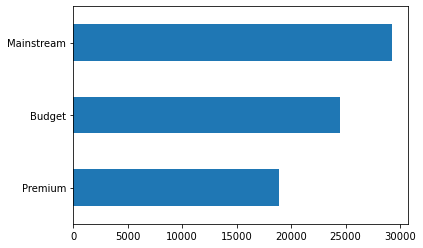

In [127]:
df_purchase['PREMIUM_CUSTOMER'].value_counts().sort_values().plot(kind='barh')

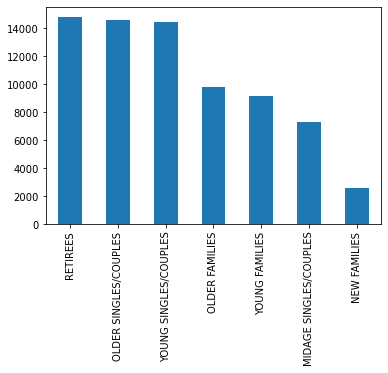

In [128]:
df_purchase['LIFESTAGE'].value_counts().sort_values(ascending = False).plot(kind='bar')

In [129]:
df_transaction.shape

(264836, 8)

In [130]:
df_transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [131]:
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [132]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [134]:
# Converting Date from int to date format
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'], unit = 'D', origin = '1899-12-30')
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [135]:
# Extracting the Brand name from Prod_Name
df_transaction['BRAND_NAME'] = df_transaction['PROD_NAME'].str.extract('([A-Za-z]+)')

In [137]:
# Extracting Pack Size from Prod_name
df_transaction['PACK_SIZE'] = df_transaction['PROD_NAME'].str.extract('([0-9g]+)')
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150g


In [143]:
df_transaction['PROD_NAME'].describe(include='all')

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [152]:
df_transaction['PROD_NAME'].str.split()[0]

['Natural', 'Chip', 'Compny', 'SeaSalt175g']

In [213]:
prod_ = np.array_split(df_transaction['PROD_NAME'].unique(), len(df_transaction['PROD_NAME'].unique()))

[array(['Natural Chip        Compny SeaSalt175g'], dtype=object),
 array(['CCs Nacho Cheese    175g'], dtype=object),
 array(['Smiths Crinkle Cut  Chips Chicken 170g'], dtype=object),
 array(['Smiths Chip Thinly  S/Cream&Onion 175g'], dtype=object),
 array(['Kettle Tortilla ChpsHny&Jlpno Chili 150g'], dtype=object),
 array(['Old El Paso Salsa   Dip Tomato Mild 300g'], dtype=object),
 array(['Smiths Crinkle Chips Salt & Vinegar 330g'], dtype=object),
 array(['Grain Waves         Sweet Chilli 210g'], dtype=object),
 array(['Doritos Corn Chip Mexican Jalapeno 150g'], dtype=object),
 array(['Grain Waves Sour    Cream&Chives 210G'], dtype=object),
 array(['Kettle Sensations   Siracha Lime 150g'], dtype=object),
 array(['Twisties Cheese     270g'], dtype=object),
 array(['WW Crinkle Cut      Chicken 175g'], dtype=object),
 array(['Thins Chips Light&  Tangy 175g'], dtype=object),
 array(['CCs Original 175g'], dtype=object),
 array(['Burger Rings 220g'], dtype=object),
 array(['NCC Sour Cream 

In [214]:
prod_list = [prod.tolist() for prod in prod_]

In [215]:
prod_split = [prod[0].split() for prod in prod_list]
prod_words = sum(prod_split,[])

In [227]:
prod_words = [word for word in prod_words if re.search('(^[A-Za-z])', word) and not re.search('([0-9])', word)]

['Natural',
 'Chip',
 'Compny',
 'CCs',
 'Nacho',
 'Cheese',
 'Smiths',
 'Crinkle',
 'Cut',
 'Chips',
 'Chicken',
 'Smiths',
 'Chip',
 'Thinly',
 'S/Cream&Onion',
 'Kettle',
 'Tortilla',
 'ChpsHny&Jlpno',
 'Chili',
 'Old',
 'El',
 'Paso',
 'Salsa',
 'Dip',
 'Tomato',
 'Mild',
 'Smiths',
 'Crinkle',
 'Chips',
 'Salt',
 'Vinegar',
 'Grain',
 'Waves',
 'Sweet',
 'Chilli',
 'Doritos',
 'Corn',
 'Chip',
 'Mexican',
 'Jalapeno',
 'Grain',
 'Waves',
 'Sour',
 'Cream&Chives',
 'Kettle',
 'Sensations',
 'Siracha',
 'Lime',
 'Twisties',
 'Cheese',
 'WW',
 'Crinkle',
 'Cut',
 'Chicken',
 'Thins',
 'Chips',
 'Light&',
 'Tangy',
 'CCs',
 'Original',
 'Burger',
 'Rings',
 'NCC',
 'Sour',
 'Cream',
 'Garden',
 'Chives',
 'Doritos',
 'Corn',
 'Chip',
 'Southern',
 'Chicken',
 'Cheezels',
 'Cheese',
 'Box',
 'Smiths',
 'Crinkle',
 'Original',
 'Infzns',
 'Crn',
 'Crnchers',
 'Tangy',
 'Gcamole',
 'Kettle',
 'Sea',
 'Salt',
 'And',
 'Vinegar',
 'Smiths',
 'Chip',
 'Thinly',
 'Cut',
 'Original',
 'Kettle

In [232]:
counter = collections.Counter(prod_words)
counter.most_common()

[('Chips', 21),
 ('Smiths', 16),
 ('Crinkle', 14),
 ('Cut', 14),
 ('Kettle', 13),
 ('Cheese', 12),
 ('Salt', 12),
 ('Original', 10),
 ('Chip', 9),
 ('Salsa', 9),
 ('Doritos', 9),
 ('Corn', 8),
 ('Pringles', 8),
 ('RRD', 8),
 ('Chicken', 7),
 ('WW', 7),
 ('Sour', 6),
 ('Sea', 6),
 ('Thinly', 5),
 ('Vinegar', 5),
 ('Chilli', 5),
 ('Thins', 5),
 ('Crisps', 5),
 ('Natural', 4),
 ('Cream', 4),
 ('Red', 4),
 ('Rock', 4),
 ('Deli', 4),
 ('Supreme', 4),
 ('Infuzions', 4),
 ('CCs', 3),
 ('Tortilla', 3),
 ('Old', 3),
 ('El', 3),
 ('Paso', 3),
 ('Dip', 3),
 ('Tomato', 3),
 ('Mild', 3),
 ('Sweet', 3),
 ('Sensations', 3),
 ('Lime', 3),
 ('Twisties', 3),
 ('Soy', 3),
 ('Cobs', 3),
 ('Popd', 3),
 ('Woolworths', 3),
 ('Tostitos', 3),
 ('Nacho', 2),
 ('Grain', 2),
 ('Waves', 2),
 ('Tangy', 2),
 ('Burger', 2),
 ('Rings', 2),
 ('Chives', 2),
 ('Cheezels', 2),
 ('And', 2),
 ('Thai', 2),
 ('BBQ', 2),
 ('SR', 2),
 ('Swt', 2),
 ('French', 2),
 ('ChipCo', 2),
 ('Smith', 2),
 ('Honey', 2),
 ('Tyrrells', 2),
 (

In [250]:
# Dropping Salsa Products 
df_transaction.drop(index = df_transaction[df_transaction['PROD_NAME'].str.find('Salsa') != -1].index, inplace = True)

In [252]:
df_transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [253]:
# There seems to be outlier where 200 chips packets are bought at once
df_transaction[df_transaction['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito,380g
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito,380g


In [254]:
df_transaction[df_transaction['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito,380g
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito,380g


In [255]:
# Let's remove this outlier based upon the loyalty card number
df_transaction.drop(index = df_transaction[df_transaction['LYLTY_CARD_NBR'] == 226000].index, inplace = True)

In [256]:
df_transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


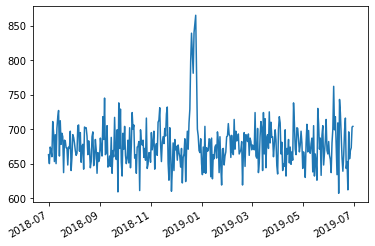

In [259]:
df_transaction['DATE'].value_counts().plot()